In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2019-11-22 13:13:01--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 2a00:1450:400c:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   143MB/s    in 0.6s    

2019-11-22 13:13:02 (143 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [0]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import layers
import os

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [0]:
local_weight_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape= (150,150,3), include_top=False, weights=None)

pre_trained_model.load_weights(local_weight_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______

In [0]:
last_layer = pre_trained_model.get_layer('mixed7')
print("last layer output shape: ", last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [0]:
print("last layer output shape: ", last_layer.output)

last layer output shape:  Tensor("mixed7/concat:0", shape=(?, 7, 7, 768), dtype=float32)


In [0]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation= 'sigmoid')(x)

model = Model(pre_trained_model.input,x)

model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'] )

In [0]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

--2019-11-22 13:14:00--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.133.128, 2a00:1450:400c:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.133.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  83.2MB/s    in 0.8s    

2019-11-22 13:14:01 (83.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()



In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

train_cats_filenames = os.listdir(train_cats_dir)
train_dogs_filenames = os.listdir(train_dogs_dir)

train_datagen = ImageDataGenerator(rescale=1.0/255.0, height_shift_range=0.2, width_shift_range=0.2, 
                                         rotation_range=40,shear_range=0.2, zoom_range=0.2, 
                                         horizontal_flip= True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_datagenerator = train_datagen.flow_from_directory(train_dir,
                                                        batch_size = 20,
                                                        target_size = (150,150),
                                                        class_mode = 'binary')

validation_datagenerator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size = 20,
                                                        target_size = (150,150),
                                                        class_mode = 'binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(train_datagenerator, validation_data = validation_datagenerator,
                              steps_per_epoch = 100,
                              epochs=20,  verbose = 2, validation_steps = 50 )

Epoch 1/20
Epoch 1/20
100/100 - 31s - loss: 0.4846 - acc: 0.7710 - val_loss: 0.3635 - val_acc: 0.9010
Epoch 2/20
Epoch 1/20
100/100 - 22s - loss: 0.3850 - acc: 0.8270 - val_loss: 0.2208 - val_acc: 0.9390
Epoch 3/20
Epoch 1/20
100/100 - 23s - loss: 0.3520 - acc: 0.8530 - val_loss: 0.4793 - val_acc: 0.9060
Epoch 4/20
Epoch 1/20
100/100 - 22s - loss: 0.3426 - acc: 0.8465 - val_loss: 0.4684 - val_acc: 0.9190
Epoch 5/20
Epoch 1/20
100/100 - 23s - loss: 0.3187 - acc: 0.8640 - val_loss: 0.4739 - val_acc: 0.9310
Epoch 6/20
Epoch 1/20
100/100 - 22s - loss: 0.2914 - acc: 0.8780 - val_loss: 0.4322 - val_acc: 0.9340
Epoch 7/20
Epoch 1/20
100/100 - 23s - loss: 0.3242 - acc: 0.8650 - val_loss: 0.2986 - val_acc: 0.9490
Epoch 8/20
Epoch 1/20
100/100 - 22s - loss: 0.2830 - acc: 0.8880 - val_loss: 0.3009 - val_acc: 0.9540
Epoch 9/20
Epoch 1/20
100/100 - 22s - loss: 0.2867 - acc: 0.8800 - val_loss: 0.4873 - val_acc: 0.9380
Epoch 10/20
Epoch 1/20
100/100 - 22s - loss: 0.2818 - acc: 0.8805 - val_loss: 0.59

In [0]:
import matplotlib.pyplot as plt
accuracy = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epoch = range(len(accuracy))
print(epoch)

range(0, 20)


<Figure size 432x288 with 0 Axes>

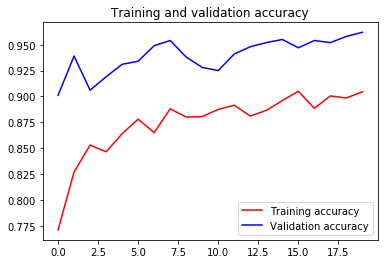

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(epoch,accuracy,'r', label = 'Training accuracy')
plt.plot(epoch,val_acc,'b', label = 'Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

<Figure size 432x288 with 0 Axes>

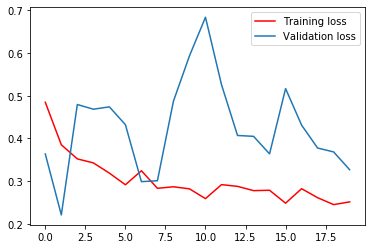

<Figure size 432x288 with 0 Axes>

In [0]:
plt.plot(epoch,loss,'r',label = 'Training loss')
plt.plot(epoch, val_loss, label = 'Validation loss')
plt.legend(loc=0)
plt.figure()


In [0]:
model.save_weights('/tmp/transfer_learning',save_format='h5')

In [0]:
model.save_weights('/tmp/transfer_learning_lite',save_format='hdf5')